In [ ]:
import pandas as pd
import numpy
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn import model_selection
from sklearn import linear_model
from sklearn import discriminant_analysis
from sklearn import tree
from sklearn import naive_bayes
import warnings
warnings.filterwarnings("ignore")

In [ ]:
dataset=pandas.read_csv('/content/loan_prediction.csv')

In [ ]:
print (dataset.shape)

(614, 13)


In [ ]:
display(dataset.head(10))

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [ ]:
display(dataset.describe())

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
import pandas

dataset = pandas.read_csv('/content/loan_prediction.csv')
if 'Loan_Status' not in dataset.columns:
    print("Column 'Loan_Status' not found in the dataset. Available columns are:", dataset.columns)
else:
    print(dataset.groupby('Loan_Status').size())

Loan_Status
N    192
Y    422
dtype: int64


In [ ]:
dataset.info

<bound method DataFrame.info of       Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN             360.0   
1               4583             1508.0       128.0             360.0   
2               3000                0.0        66.0             360.0   
3               2583             2358.0       120.0             360.0   
4               6000                0.0       141.0             360.0   
..               ...                ...         ...               ...   
609             2900                0.0        71.0             360.0   
610             4106                0.0        40.0             180.0   
611             8072              240.0       253.0             360.0   
612             7583                0.0       187.0             360.0   
613             4583                0.0       133.0             360.0   

     Credit_History Property_Area Loan_Status  
0               1.0         Urban           Y  
1               1.0         Rural           N  
2               1.0         Urban           Y  
3               1.0         Urban           Y  
4               1.0         Urban           Y  
..              ...           ...         ...  
609             1.0         Rural           Y  
610             1.0         Rural           Y  
611             1.0         Urban           Y  
612             1.0         Urban           Y  
613             0.0     Semiurban           N  

[614 rows x 13 columns]>

In [ ]:
import pandas

dataset = pandas.read_csv('//content/loan_prediction.csv')
print("Available columns:", dataset.columns)
try:
    loan_status_counts = dataset['Loan_Status'].value_counts()
    print(loan_status_counts)
except KeyError:
    print("Column 'Loan_Status' not found in the dataset.")

Available columns: Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')
Loan_Status
Y    422
N    192
Name: count, dtype: int64


In [ ]:
dataset.duplicated().sum()

0

In [ ]:
dataset.isna().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


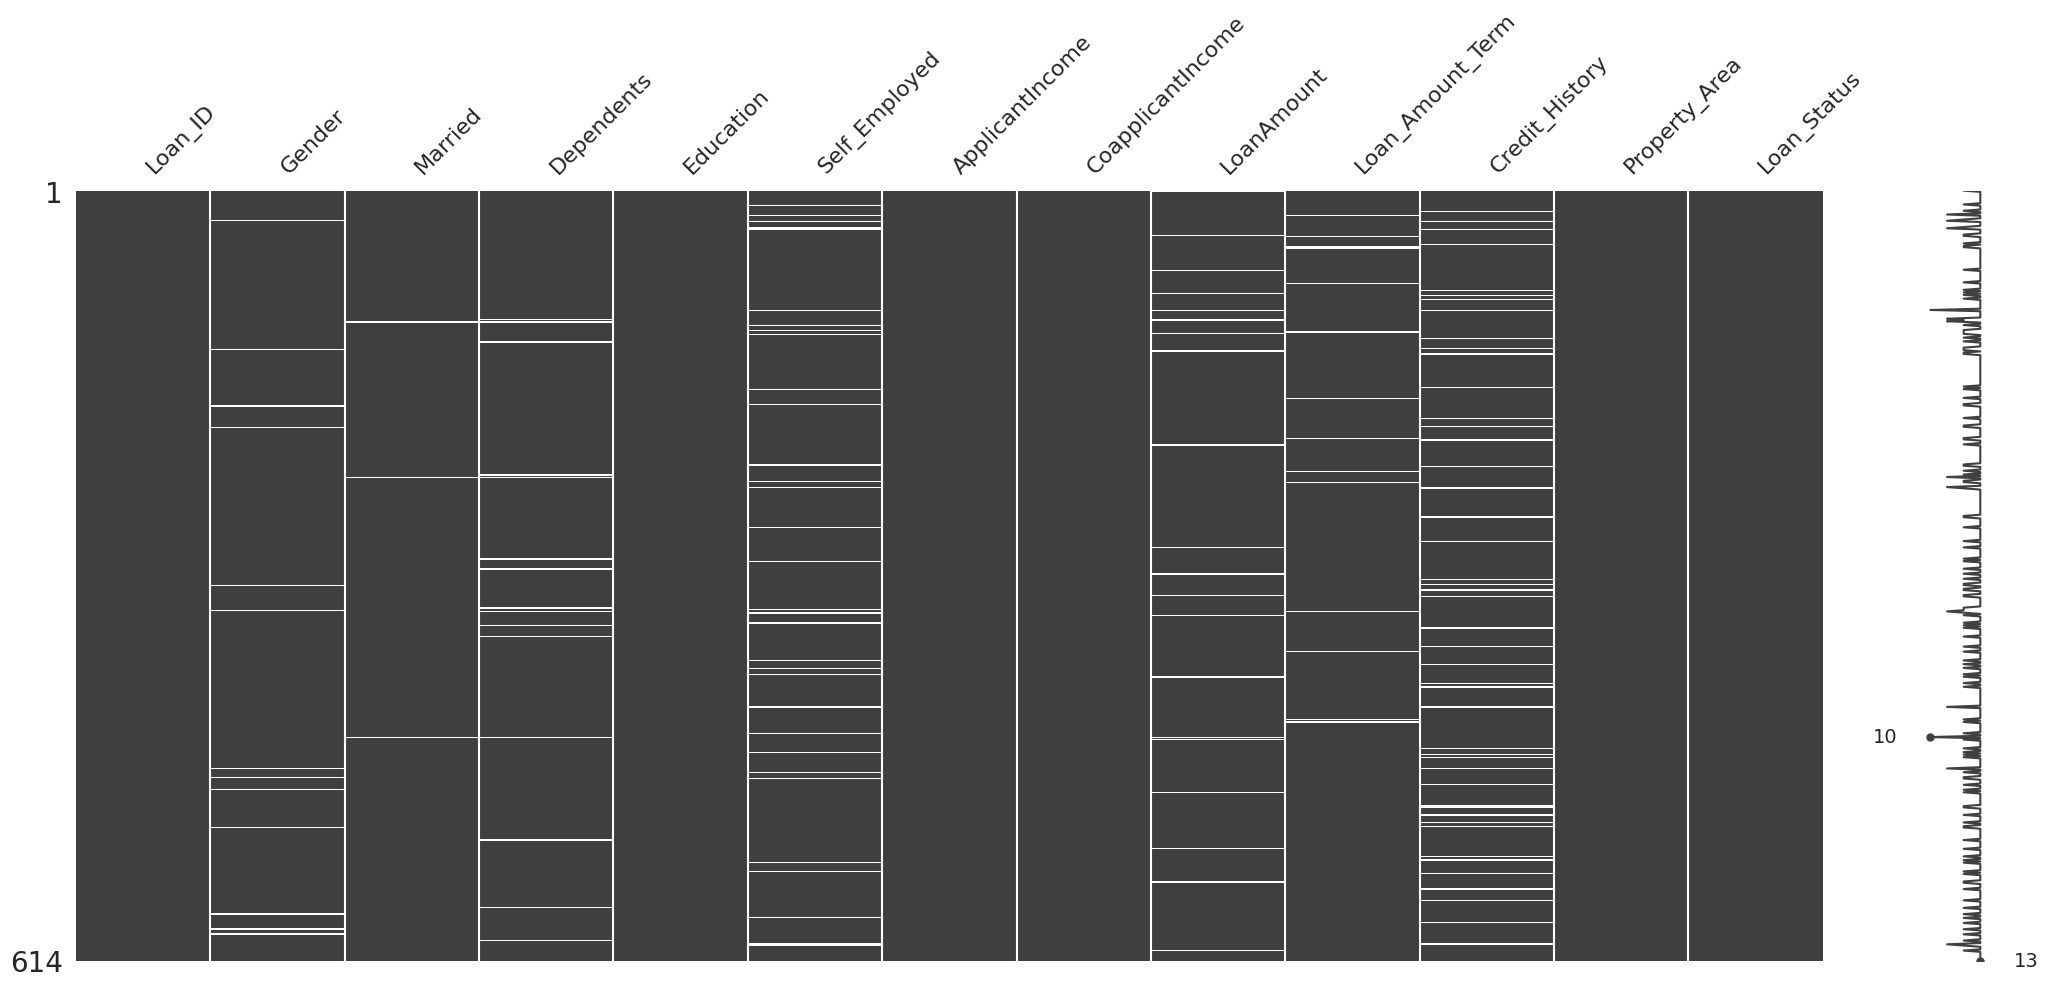

In [ ]:
msno.matrix(dataset)
plt.show()

In [ ]:
dataset['Gender'].value_counts()

,count
Gender,
Male,489
Female,112


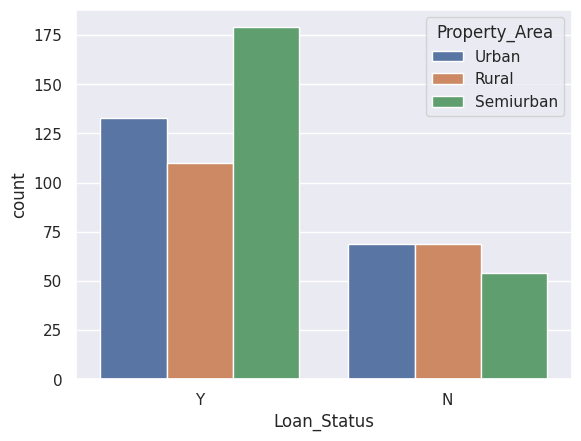

In [ ]:
sns.countplot(data=dataset, x='Loan_Status', hue='Property_Area')
plt.show()

<Axes: xlabel='Loan_Status', ylabel='count'>

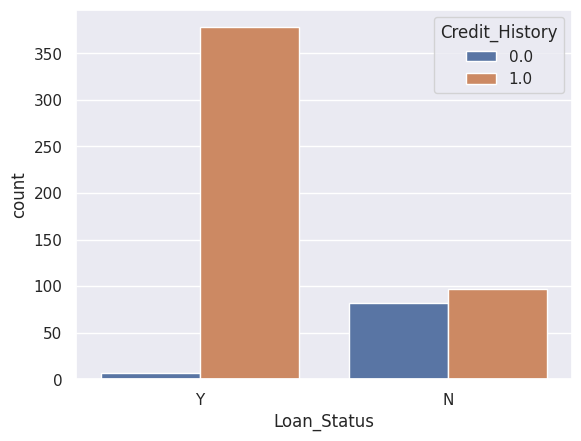

In [ ]:
sns.countplot(data=dataset,x='Loan_Status',hue ='Credit_History')

<Axes: xlabel='Loan_Status', ylabel='count'>

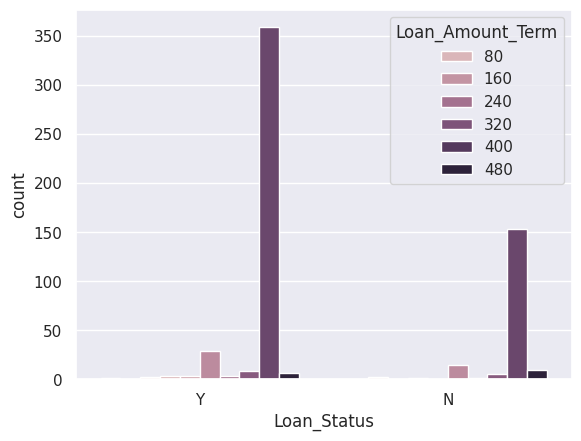

In [ ]:
sns.countplot(data=dataset,x='Loan_Status',hue ='Loan_Amount_Term')

<Axes: xlabel='Loan_Status', ylabel='LoanAmount'>

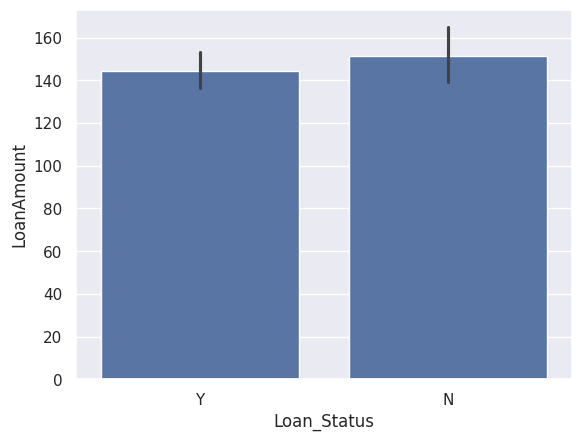

In [ ]:
sns.barplot(data=dataset,x='Loan_Status',y ='LoanAmount')

<Axes: xlabel='Loan_Status', ylabel='count'>

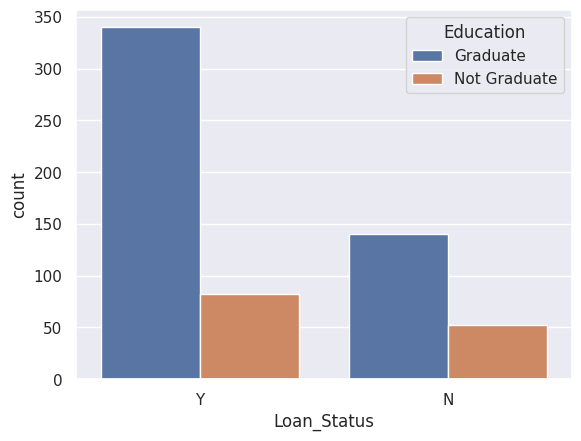

In [ ]:
sns.countplot(data=dataset,x='Loan_Status',hue ='Education')

<Axes: xlabel='Loan_Status', ylabel='count'>

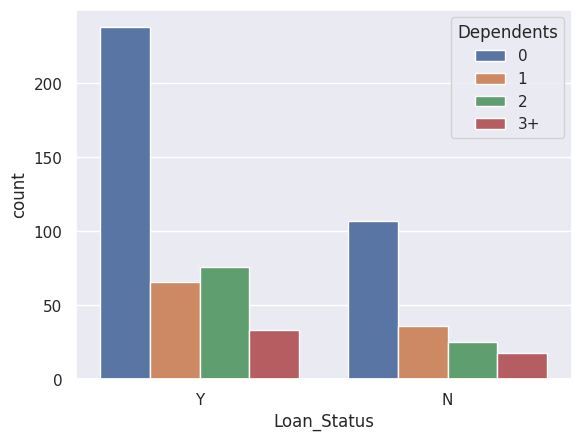

In [ ]:
sns.countplot(data=dataset,x='Loan_Status',hue ='Dependents')

<Axes: xlabel='Loan_Status', ylabel='count'>

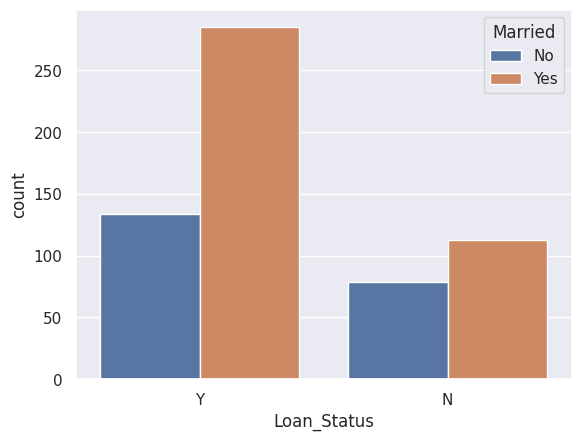

In [ ]:
sns.countplot(data=dataset,x='Loan_Status',hue ='Married')

<Axes: xlabel='Loan_Status', ylabel='count'>

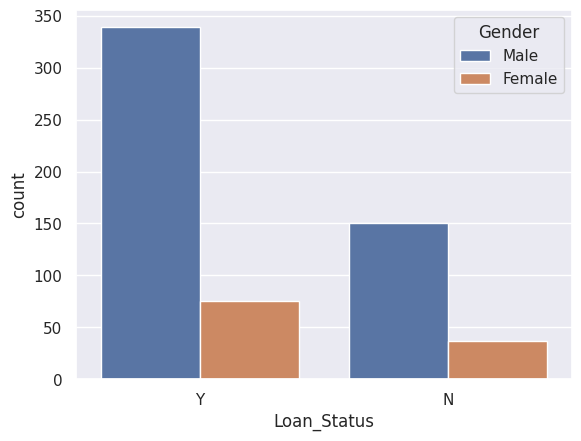

In [ ]:
sns.countplot(data=dataset,x='Loan_Status',hue ='Gender')

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [ ]:
dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
dataset['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [ ]:
dataset['Married'].unique()

array(['No', 'Yes', nan], dtype=object)

In [ ]:
dataset['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [ ]:
dataset['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [ ]:
dataset['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [ ]:
dataset['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [ ]:
dataset['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [ ]:
dataset['Loan_Amount_Term'].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [ ]:
dataset['Gender'] = label_encoder.fit_transform(dataset['Gender'])
dataset['Gender'].unique()

array([1, 0, 2])

In [ ]:
dataset['Married'] = label_encoder.fit_transform(dataset['Married'])
dataset['Married'].unique()

array([0, 1, 2])

In [ ]:
dataset['Dependents']=label_encoder.fit_transform(dataset['Dependents'])
dataset['Dependents'].unique()

array([0, 1, 2, 3, 4])

In [ ]:
dataset['Education'] = label_encoder.fit_transform(dataset['Education'])
dataset["Education"].unique()

array([0, 1])

In [ ]:
dataset['Self_Employed'] = label_encoder.fit_transform(dataset['Self_Employed'])
dataset['Self_Employed'].unique()

array([0, 1, 2])

In [ ]:
dataset['Property_Area'] = label_encoder.fit_transform(dataset['Property_Area'])
dataset['Property_Area'].unique()

array([2, 0, 1])

In [ ]:
dataset['Loan_Amount_Term'] = label_encoder.fit_transform(dataset['Loan_Amount_Term'])
dataset['Loan_Amount_Term'].unique()

array([ 8,  4,  6, 10,  5,  2,  7,  9,  1,  3,  0])

In [ ]:
dataset['Loan_Status'] = label_encoder.fit_transform(dataset['Loan_Status'])
dataset['Loan_Status'].unique()

array([1, 0])

<Axes: xlabel='ApplicantIncome'>

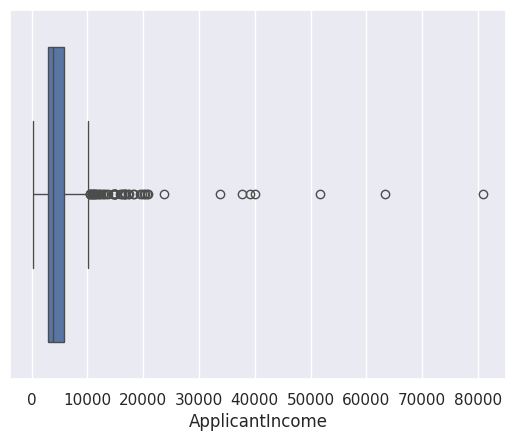

In [ ]:
sns.boxplot(x=dataset['ApplicantIncome'])

<Axes: xlabel='CoapplicantIncome'>

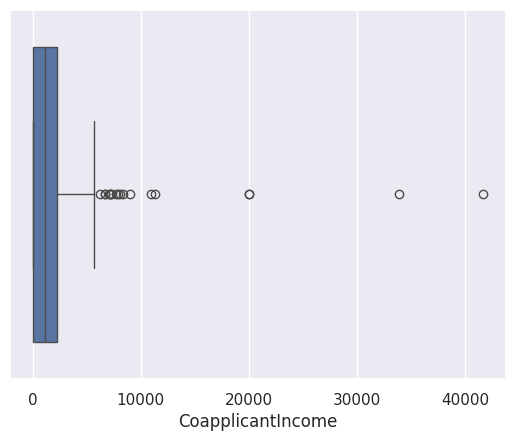

In [ ]:
sns.boxplot(x=dataset['CoapplicantIncome'])

<Axes: xlabel='LoanAmount'>

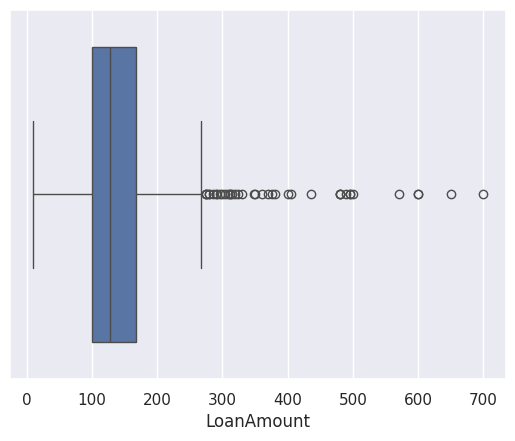

In [ ]:
sns.boxplot(x=dataset['LoanAmount'])

,count
Loan_Status,
1,422
0,192


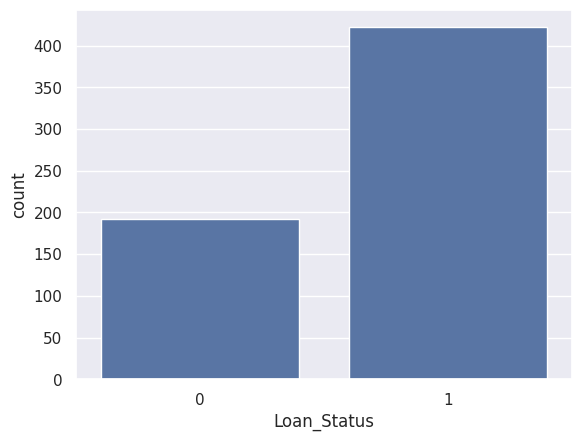

In [ ]:
sns.countplot(data = dataset, x='Loan_Status')
dataset['Loan_Status'].value_counts()

<Axes: >

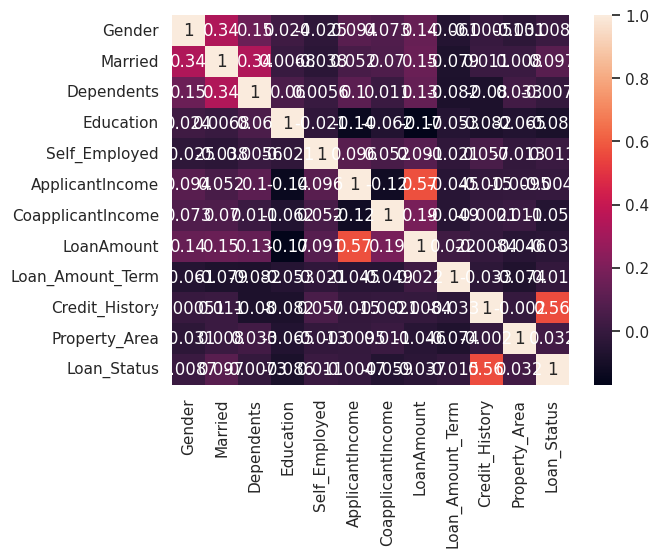

In [ ]:
import seaborn as sns
import pandas as pd
numerical_features = dataset.select_dtypes(include=['number'])
correlation_matrix = numerical_features.corr()
sns.heatmap(correlation_matrix, fmt='.2g', annot=True)